In [1]:
import praw
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1)the first thing is go to reddit and create a reddit account
#https://www.reddit.com/
#2) create a reddit app. Make sure you're signed in to your reddit account,then go to the app page
#From here, click on the "create an app" button. Make sure that you've selected the "script" option in the checkbox,
#fill in a name and description. 
#For the two URL fields, it doesn't really matter what you put.
#https://ssl.reddit.com/prefs/apps/

In [2]:
#To pull down some real, live reddit posts ,we need some information from our app. 
#Reddit uses this information to keep track of who is accessing their data, and in what ways they're accessing it.
#In code,enter client_id,client_secret,username in order to collect data. 
ID = 'hiXdCt4qu-t4LOSYPQbOeg'
user_name = "Certain_Extension734"
API = 'dTismPVgY7H3fttQnRWYuHLEDhEP-w'

In [3]:
# This line calls a function in the praw library.
# That function sets up to easily make calls to the reddit API moving without
# having to enter this information every time we make a call
reddit = praw.Reddit(client_id=ID,client_secret=API,user_agent=user_name)

In [4]:
#To test if instance is working
print(reddit.read_only) # Output: True

True


In [79]:
#Random post from subreddit "AskReddit"
# Make sure to use the subreddit name correctly,it should be same name,format as in reddit app
random_post = reddit.subreddit("AskReddit").random()
print(random_post.title)

What are some survival facts that people claim are fake?


In [80]:
#Top 10 posts in  fron the subreddit "Buffalo"
for posts in reddit.subreddit("Buffalo").hot(limit=10):
    print(posts.title)

Join the unofficial Official Buffalo Discord Server!
Moving to Buffalo FAQ - Newcomers Visit Here Before Posting
ITS HAPPENING! Broadway Market secures $37 million in State Funds to transform the Market
I’m sorry but….
A March day on Main Street: Buffalo Times, 3-19-1905
attention local liberal minded firearm enthusiasts
West Seneca Police officer charged in alleged off-duty thefts from home improvement stores
I planted my planter and seeds a few days ago
Deputy Indicted on Multiple Charges for Forcibly Touching Female Inmate
New York court rejects congressional maps


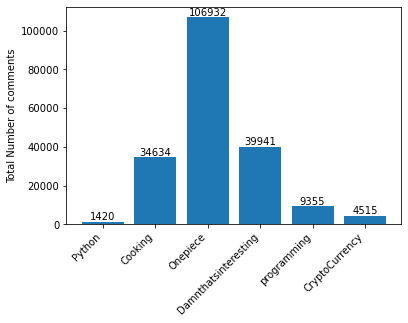

In [82]:
#Graph of total number of comments for 10 posts in each subreddit, 
#subreddits=['Python','Cooking','Onepiece','Damnthatsinteresting','programming']
a1=0
for submission in reddit.subreddit("Python").top('year',limit=10):
    a1=submission.num_comments+a1
# Make sure to use the num_comments name as it is to get the number of comments
     
a2=0
for submission in reddit.subreddit("Cooking").top('year',limit=10):
    a2=submission.num_comments+a2

     
a3=0
for submission in reddit.subreddit("Onepiece").top('year',limit=10):
    a3=submission.num_comments+a3
     
a4=0
for submission in reddit.subreddit("Damnthatsinteresting").top('year',limit=10):
    a4=submission.num_comments+a4
     
a5=0
for submission in reddit.subreddit("programming").top('year',limit=10):
    a5=submission.num_comments+a5
     
a6=0
for submission in reddit.subreddit("CryptoCurrency").top('year',limit=1):
    a6=submission.num_comments+a6
     

x1=[a1,a2,a3,a4,a5,a6]
x2=['Python','Cooking','Onepiece','Damnthatsinteresting','programming','CryptoCurrency']

plt.bar(x2, x1)
plt.ylabel('Total Number of comments')
plt.xticks(rotation = 45,verticalalignment='top',horizontalalignment='right')
plt.text(x2[0],a1,a1,ha="center",va="bottom")
plt.text(x2[1],a2,a2,ha="center",va="bottom")
plt.text(x2[2],a3,a3,ha="center",va="bottom")
plt.text(x2[3],a4,a4,ha="center",va="bottom")
plt.text(x2[4],a5,a5,ha="center",va="bottom")
plt.text(x2[5],a6,a6,ha="center",va="bottom")
plt.show()

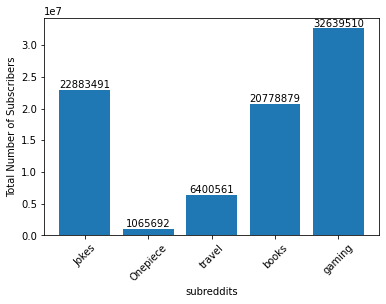

'\nplt.text(x2[1],a2,a2,ha="center",va="bottom")\nplt.text(x2[2],a3,a3,ha="center",va="bottom")\nplt.text(x2[3],a4,a4,ha="center",va="bottom")\nplt.text(x2[4],a5,a5,ha="center",va="bottom")\nplt.text(x2[5],a6,a6,ha="center",va="bottom")\nplt.show(\n'

In [55]:
#'subreddit_subscribers'
subreddits = ['Jokes','Onepiece', 'travel', 'books',  'gaming']
l =[]
for sr in subreddits:
    a1 = 0
    for post in reddit.subreddit(sr).top('year',limit=1):
        a1=post.subreddit_subscribers

# Make sure to use the subreddit_subscribers name as it is to get the number of subscribers
    l.append(a1)
plt.bar(subreddits, l)
plt.ylabel('Total Number of Subscribers')
plt.xlabel('subreddits')
plt.xticks(rotation = 45,verticalalignment='top',horizontalalignment='center')
for i in range(5):
    plt.text(subreddits[i],l[i],l[i],ha="center",va="bottom")
plt.show()

In [106]:
subreddits = ['Jokes','Onepiece', 'travel', 'books',  'gaming']


s =[]
for sr in subreddits:

    for submission in reddit.subreddit(sr).top('year',limit=5):
        s.append([submission.title,submission.url,submission.subreddit_name_prefixed,submission.selftext,submission.over_18,
                  submission.subreddit_subscribers,submission.ups,submission.num_comments,
                  submission.upvote_ratio,submission.total_awards_received,submission.author.name])
# we put number of posts limit =5 , because it takes time to run code
# the other data we can get = [ 'created_utc', 
                     #'is_crosspostable', 'is_self', 'is_video', 'locked', 'media_only', 'over_18',
                     #'subreddit_id', 'subreddit_name_prefixed', 'subreddit_subscribers', 
                     #'title', 'permalink', 
                     #'total_awards_received', 'downs','gilded','num_comments', 'num_crossposts', 'num_reports', 
                     #'ups']
# Make sure to use the title,ups,url,subreddit_name_prefixed,subreddit_name_prefixed,num_comments.....
#.....all names exactly as mentioned in above comment
s = pd.DataFrame(s,columns=['title',  'url','subreddit_name_prefixed','body','Over 18',
                            'subreddit_subscribers','Upvotes','num_comments','upvote_ratio','Awards',
                             'author_name'])

s

,title,url,subreddit_name_prefixed,body,Over 18,subreddit_subscribers,Upvotes,num_comments,upvote_ratio,Awards,author_name
0,"Can we ban ""yo momma"" jokes from this sub? The...",https://www.reddit.com/r/Jokes/comments/n3x0hc...,r/Jokes,Just like yo mamma,False,22886009,60726,3345,0.78,207,merio67
1,A man obsessed with trains finally steals one ...,https://www.reddit.com/r/Jokes/comments/p094j3...,r/Jokes,"At the trial, the man is found guilty of multi...",False,22886009,50294,887,0.90,169,IAlbatross
2,"Professor X asks a girl, ""what is your mutant ...",https://www.reddit.com/r/Jokes/comments/nrp0xt...,r/Jokes,"Girl replies: ""I can guess how many pulls to t...",False,22886009,50126,1446,0.90,100,Blorb-Man
3,what's the fastest way to get banned from r/co...,https://www.reddit.com/r/Jokes/comments/rjeri4...,r/Jokes,source?,False,22886009,47716,5935,0.72,111,connie-lingus38
4,My mate broke his leg so I went to see him at ...,https://www.reddit.com/r/Jokes/comments/oss6sj...,r/Jokes,"Anyway, so I went up to my friend's room, “Ho...",True,22886009,44542,791,0.84,100,littleboy_xxxx
5,Yet another One Piece fan at the olympics! SUU...,https://i.redd.it/3k0ez6q38gf71.gif,r/OnePiece,,False,1066095,50796,958,0.93,203,MonseGato
6,One Piece: Chapter 1044,https://www.reddit.com/r/OnePiece/comments/tnb...,r/OnePiece,"##**Chapter 1044: ""Warrior of Liberation""**\n\...",False,1066095,34403,37032,0.90,1262,Kirosh2
7,Chapter 1044 spoilers,https://www.reddit.com/r/OnePiece/comments/tk0...,r/OnePiece,"Full summary, thanks to redon from Arlong Park...",False,1066095,31371,29107,0.85,1610,NE_ED
8,Jamie Lee Curtis stated at the Oscars that she...,https://v.redd.it/wd1ey1mrk4q81,r/OnePiece,,False,1066095,31227,741,0.91,31,zorojuri_200
9,Made this Cowboy Bebop style opening sequence ...,https://v.redd.it/7wsv68mfr2771,r/OnePiece,,False,1066095,27743,885,0.96,1104,matthiz


In [107]:
s.corr()
#corel
#The correlation coefficient is a statistical measure of the strength of the relationship between 
#the relative movements of two variables. The values range between -1.0 and 1.0
#A value of exactly 1.0 means there is a perfect positive relationship between the two variables.
#For a positive increase in one variable, there is also a positive increase in the second variable.
#A value of -1.0 means there is a perfect negative relationship between the two variables.
#This shows that the variables move in opposite directions—for a positive increase in one variable, there is a decrease in the second variable. 
#The strength of the relationship varies in degree based on the value of the correlation coefficient. 
#Analysts in some fields of study do not consider correlations important until the value surpasses at least 0.8.

,Over 18,subreddit_subscribers,Upvotes,num_comments,upvote_ratio,Awards
Over 18,1.000000,0.108963,-0.054616,-0.084750,-0.210722,-0.095751
subreddit_subscribers,0.108963,1.000000,0.742923,-0.266751,-0.330392,-0.141590
Upvotes,-0.054616,0.742923,1.000000,0.001231,-0.163897,0.311532
num_comments,-0.084750,-0.266751,0.001231,1.000000,-0.238006,0.739380
upvote_ratio,-0.210722,-0.330392,-0.163897,-0.238006,1.000000,-0.136405
Awards,-0.095751,-0.141590,0.311532,0.739380,-0.136405,1.000000


<AxesSubplot:>

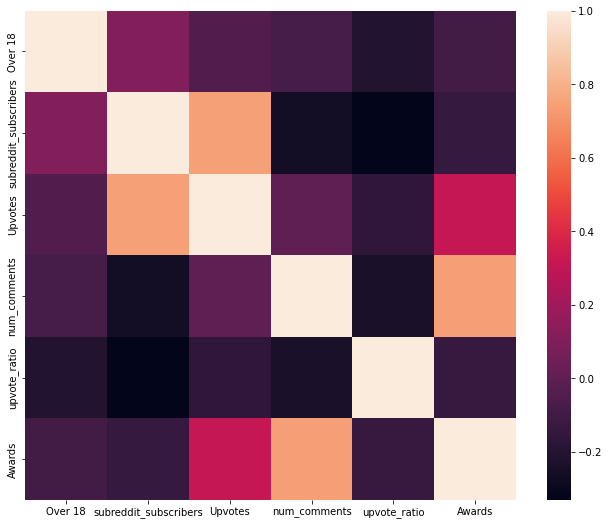

In [108]:
corr = s.corr()
#A heatmap is a graphical representation of data where each value of a matrix is represented as a color. 
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

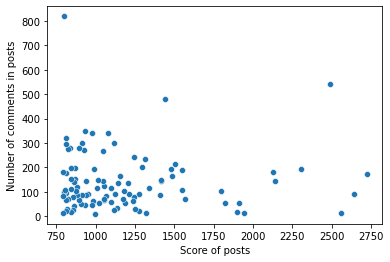

In [86]:
#
x3=[]
x4=[]
for submission in reddit.subreddit("Python").top('year'):
    x3.append(submission.score)
for submission in reddit.subreddit("Python").top('year'):
    x4.append(submission.num_comments)
plt.ylabel('Number of comments in posts')
plt.xlabel('Score of posts')

sns.scatterplot(x=x3,y=x4)
plt.show()